# Introduction to PyTorch Tensors

In [2]:
import torch
import torch.nn as nn

from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

import numpy as np

### Tensors: creation and basic operations

In [2]:
# Create a tensor: method tensor() of torch
tensor_example = torch.tensor([[1,2,3], [4,5,6]])
print(tensor_example)

# Displaying basic properties of tensors
print()
print(f"Shape of tensor: {tensor_example.shape}")
print(f"Data type of tensor: {tensor_example.dtype}")

tensor([[1, 2, 3],
        [4, 5, 6]])

Shape of tensor: torch.Size([2, 3])
Data type of tensor: torch.int64


In [3]:
# Creating two tensors
tensor_a = torch.tensor([[1, 2], [3, 4]], dtype = torch.int32)
tensor_b = torch.tensor([[5, 6], [7, 8]], dtype = torch.int32)

# Tensor element-wise addition
tensor_sum = torch.add(tensor_a, tensor_b)
print(f"Tensor Addition:\n{tensor_sum}\n")
# Or equivalently
tensor_sum = tensor_a + tensor_b
print(f"Tensor Addition:\n{tensor_sum}")

print("-------------------------------------------------------------")

# Element-wise Multiplication
tensor_product = torch.mul(tensor_a, tensor_b)
print(f"Element-wise Multiplication:\n{tensor_product}\n")
# Or equivalently
tensor_product = tensor_a * tensor_b
print(f"Element-wise Multiplication:\n{tensor_product}")

print("-------------------------------------------------------------")

# Matrix Multiplication
tensor_c = torch.tensor([[1], [2]], dtype = torch.int32) # 2x1 tensor
tensor_matmul = torch.matmul(tensor_a, tensor_c)
print(f"Matrix Multiplication:\n{tensor_matmul}")

print("-------------------------------------------------------------")

# Broadcasted Addition (Tensor + scalar)
tensor_add_scalar = tensor_a + 5
print(f"Broadcasted Addition (Adding scalar value):\n{tensor_add_scalar}\n")

# Broadcasted Addition between tensors of different shapes (same as torch.add)
broadcasted_sum = tensor_a + tensor_c
print(f"Broadcasted Addition:\n{broadcasted_sum}\n")

# Broadcasted Multiplication between tensors of different shapes (same as torch.mul)
broadcasted_mul = tensor_a * tensor_c
print(f"Broadcasted Multiplication:\n{broadcasted_mul}")

Tensor Addition:
tensor([[ 6,  8],
        [10, 12]], dtype=torch.int32)

Tensor Addition:
tensor([[ 6,  8],
        [10, 12]], dtype=torch.int32)
-------------------------------------------------------------
Element-wise Multiplication:
tensor([[ 5, 12],
        [21, 32]], dtype=torch.int32)

Element-wise Multiplication:
tensor([[ 5, 12],
        [21, 32]], dtype=torch.int32)
-------------------------------------------------------------
Matrix Multiplication:
tensor([[ 5],
        [11]], dtype=torch.int32)
-------------------------------------------------------------
Broadcasted Addition (Adding scalar value):
tensor([[6, 7],
        [8, 9]], dtype=torch.int32)

Broadcasted Addition:
tensor([[2, 3],
        [5, 6]], dtype=torch.int32)

Broadcasted Multiplication:
tensor([[1, 2],
        [6, 8]], dtype=torch.int32)


In [4]:
# Creating a tensor for manipulation
tensor_a = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(f"Original Tensor:\n{tensor_a}\n")

# Reshape the tensor: method view() of the tensor object
reshaped_tensor = tensor_a.view(3, 2)
print(f"Reshaped Tensor:\n{reshaped_tensor}\n")

# Flatten the tensor
flattened_tensor = tensor_a.view(-1)
print(f"Flattened Tensor:\n{flattened_tensor}")

Original Tensor:
tensor([[1, 2, 3],
        [4, 5, 6]])

Reshaped Tensor:
tensor([[1, 2],
        [3, 4],
        [5, 6]])

Flattened Tensor:
tensor([1, 2, 3, 4, 5, 6])


### TensorDatasets and DataLoaders

In [5]:
# Define a simple array of input data
X = np.array([[1.0, 2.0], [2.0, 1.0], [3.0, 4.0], [4.0, 3.0]])  # 4x2

# Define the target outputs for our dataset
y = np.array([0, 1, 0, 1])  # 1x4

# Convert X and y into PyTorch tensors
X_tensor = torch.tensor(X, dtype = torch.float32)
y_tensor = torch.tensor(y, dtype = torch.int32)

# Create a tensor dataset 
dataset = TensorDataset(X_tensor, y_tensor)

# Print x and y of the TensorDataset
for i in range(len(dataset)):
    X_sample, y_sample = dataset[i]
    print(f"X[{i}]: {X_sample}, y[{i}]: {y_sample}")

X[0]: tensor([1., 2.]), y[0]: 0
X[1]: tensor([2., 1.]), y[1]: 1
X[2]: tensor([3., 4.]), y[2]: 0
X[3]: tensor([4., 3.]), y[3]: 1


In [6]:
# Create a data loader
dataloader = DataLoader(dataset, batch_size = 2, shuffle = False)

# Iterate through the dataloader
for batch_X, batch_y in dataloader:
    print(f"Batch X:\n{batch_X}")
    print(f"Batch y:\n{batch_y}\n")

print("-------------------------------------------------------------")

# Create a shuffling data loader
dataloader_shuffle = DataLoader(dataset, batch_size = 2, shuffle = True)

# Iterate through the dataloader
for batch_X, batch_y in dataloader_shuffle:
    print(f"Batch X:\n{batch_X}")
    print(f"Batch y:\n{batch_y}\n")

Batch X:
tensor([[1., 2.],
        [2., 1.]])
Batch y:
tensor([0, 1], dtype=torch.int32)

Batch X:
tensor([[3., 4.],
        [4., 3.]])
Batch y:
tensor([0, 1], dtype=torch.int32)

-------------------------------------------------------------
Batch X:
tensor([[1., 2.],
        [2., 1.]])
Batch y:
tensor([0, 1], dtype=torch.int32)

Batch X:
tensor([[4., 3.],
        [3., 4.]])
Batch y:
tensor([1, 0], dtype=torch.int32)



### Processing Tensors with PyTorch Neural Network Layers

In [7]:
# Define an input tensor with specific values
input_tensor = torch.tensor([[1.0, 2.0]], dtype=torch.float32)  # 1x2

# Create a linear layer with 2 input features and 3 output features
layer = nn.Linear(in_features = 2, out_features = 3)

# Process the input through the linear layer to get initial output
# A linear layer operates via the formula: y = W*x + b, with W weigth matrix, x input vector, y output, b bias vector
# Weights and biases are initialized randomly
output_tensor = layer(input_tensor)

# Display the original input tensor
print(f"Input Tensor:\n{input_tensor}\n")

# Display the output before activation to see the linear transformation effect
print(f"Output Tensor Before Activation:\n{output_tensor}\n")

Input Tensor:
tensor([[1., 2.]])

Output Tensor Before Activation:
tensor([[-0.0475,  2.4381,  0.7913]], grad_fn=<AddmmBackward0>)



_AddmmBackward0_ in the output means that PyTorch is keeping track of this operation, which will help compute the gradients automatically during model training

Activation functions introduce non-linearity into the model, enabling it to handle more complex patterns in the data.
Two commonly used activation functions are ReLU (Rectified Linear Unit) and Sigmoid.

Effect of the ReLU function: it zeroes out any negative values, converting them to zero, while keeping positive values unchanged. This introduces non-linearity into the model

In [8]:
# Define a ReLU activation function to introduce non-linearity
relu = nn.ReLU()

# Apply the ReLU function to the output of the linear layer
activated_output_relu = relu(output_tensor)

# Display the output after activation to observe the effect of ReLU
print(f"Output Tensor After ReLU Activation:\n{activated_output_relu}")

Output Tensor After ReLU Activation:
tensor([[0.0000, 2.4381, 0.7913]], grad_fn=<ReluBackward0>)


The _grad_fn=ReluBackward0_ shows that the ReLU operation is also being tracked for automatic differentiation during training.

Sigmoid squashes values between 0 and 1: it is useful for binary classification and probabilities

In [9]:
# Define a Sigmoid activation function
sigmoid = nn.Sigmoid()

# Apply the Sigmoid function to the output of the linear layer
activated_output_sigmoid = sigmoid(output_tensor)

# Display the output after applying the Sigmoid function
print(f"Output Tensor After Sigmoid Activation:\n{activated_output_sigmoid}")

Output Tensor After Sigmoid Activation:
tensor([[0.4881, 0.9197, 0.6881]], grad_fn=<SigmoidBackward0>)


# Building a Neural Network in PyTorch

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import accuracy_score

import numpy as np

### Initializing a Neural Network model from scratch

The building blocks of a Neural Network model are _modules_. PyTorch’s modules are encapsulated as Python classes, with the base one being the nn.Module class. Any model created in PyTorch is a subclass of the nn.Module

In [11]:
class SimpleNN(nn.Module):   # start by defining a class named SimpleNN which inherits from PyTorch's nn.Module
    def __init__(self):
        super(SimpleNN, self).__init__()   # retrieve the parent class of SimpleNN, i.e., nn.Module(), and apply its initialization method to the class which is being built, labelled "self" 
        self.layer1 = nn.Linear(in_features = 2, out_features = 10)   # first fully connected layer: input size 2, output size 10
        self.relu = nn.ReLU()    # ReLU activation function to be used after layer1
        self.layer2 = nn.Linear(in_features = 10, out_features = 1)   # Second fully connected layer: the input size of each layer must always match the output size of the preceding one
        self.sigmoid = nn.Sigmoid()   # Sigmoid activation function to be used after layer2

    def forward(self, x):   # this method orchestrates the flow of data, specifying the sequence in which the layers and activation functions are applied to the input
        x = self.layer1(x)   # apply layer1 (input: 2, output: 10)
        x = self.relu(x)   # apply ReLU activation function (output: 10)
        x = self.layer2(x)   # apply layer2 (input: 10, output: 1)
        x = self.sigmoid(x)   # apply Sigmoid activation function (output: 1)
        return x

In [12]:
model = SimpleNN()   # create an instance of the SimpleNN class, representing the model to train
print(model)   # print the architecture of the model

SimpleNN(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=10, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


### Initializing a Neural Network model using PyTorch's nn.Sequential

The Sequential model is a linear stack of layers, each having one input tensor and one output tensor, that you can easily create using the nn.Sequential() function. It makes the building of models more comfortable, and the created models are shorter and more readable.

The previously discussed method to build neural networks, consisting in definining a custom class, adding layers inside the constructor, and implementing the forward method, is flexible but can be an overkill for simple models. Here is where Sequential Models are handy — creating compact and understandable models.



In [13]:
model = nn.Sequential(
    nn.Linear(2, 10),  # First layer: input size 2, output size 10
    nn.ReLU(),         # ReLU activation function
    nn.Linear(10, 1),  # Second layer: input size 10, output size 1
    nn.Sigmoid()       # Sigmoid activation function
)

print("Sequential Model Architecture:\n", model)

Sequential Model Architecture:
 Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
  (3): Sigmoid()
)


### Training a Neural Network Model with PyTorch

Training a model is a process of learning the weight parameters that minimize the error on the training data. The process involves passing data through the model (forward propagation), computing the loss (how far the model's prediction is from the actual value), and then adjusting the weights using this loss (Backward Propagation).

To do this in PyTorch, we will need our training data, a defined model, a loss function, and an optimizer for adjusting the weights.

Supervised learning techniques require input data (features) and output data (target/labels). In the following example, the input represents the average goals scored by a soccer team and the average goals conceded by their opponent during the season (each row represents a team). The output is binary, indicating whether the team is likely to win a match against this specific opponent (1) or not (0).

In [14]:
import torch

# Input features [Average Goals Scored, Average Goals Conceded by Opponent]
X = torch.tensor([
    [3.0, 0.5], [1.0, 1.0], [0.5, 2.0], [2.0, 1.5],
    [3.5, 3.0], [2.0, 2.5], [1.5, 1.0], [0.5, 0.5],
    [2.5, 0.8], [2.1, 2.0], [1.2, 0.5], [0.7, 1.5]
], dtype=torch.float32)   # 12x2 - twelve teams considered, two features per datapoint (features = num of columns!)

# Target outputs [1 if the team is likely to win, 0 otherwise]
y = torch.tensor([[1], [0], [0], [1], [1], [0], [1], [0], [1], [0], [1], [0]], dtype=torch.float32)   # 12x1

It is important to note that we've used dtype=torch.float32 for both X and y as our loss function (Binary Cross-Entropy) requires the target tensor y to be in floating-point format. Other loss functions may require different data types, so it's crucial to ensure compatibility

In [15]:
# Define the model using nn.Sequential
model = nn.Sequential(
    nn.Linear(2, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)

To train the NN model we need _criterion_ (also known as a _loss function_) and an _optimizer_.

The criterion measures how far the model's predictions are from the actual output. PyTorch provides several loss function classes, and for this binary classification task we use the Binary Cross-Entropy (BCE) Loss.

The optimizer is used to update the model parameters (weights and biases) based on the derivatives computed during backpropagation. PyTorch offers several optimization algorithms under torch.optim. In this example, we use Adam with a learning rate of 0.1

In [16]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)   # Learning rate is very important!

Training a neural network typically involves iteratively passing data through our model, calculating the loss, and backpropagating the loss to update our model. This process is repeated for a certain number of epochs. An epoch is one complete pass through the entire training dataset.

**Step-by-step explanation:**

**1. Model Training Mode:** model.train() places the model in training mode, enabling necessary features that should only be 
active during training. It's good practice to keep it inside the loop to ensure the model is consistently set to training mode at the start of each epoch, especially if you might switch to other modes for some reason during the training process.

**2. Reset Gradients:** optimizer.zero_grad() is called to reset the gradients of the model parameters; this is crucial because gradients accumulate by default in PyTorch.

**3. Forward Pass:** outputs = model(X) computes the model's predictions based on the current state of the model parameters.

**4. Loss Calculation:** The loss is calculated by comparing the model's predictions (outputs) to the true labels (y) using the pre-defined loss function criterion, which in this case is nn.BCELoss().

Following the loss calculation, the backward pass is initiated:

**1. Backward Pass:** loss.backward() computes the gradients of the loss with respect to each parameter.

**2. Parameter Update:** The optimizer uses these gradients in optimizer.step() to adjust the model's parameters, reducing the loss for the next iteration.

This sequence is repeated for a predefined number of epochs (50 in this case), allowing the model to iteratively learn and improve its performance on the training data.

In [17]:
# Train the model for 50 epochs
for epoch in range(50):  
    model.train()  # Set the model to training mode

    optimizer.zero_grad()  # Zero the gradients for this iteration

    outputs = model(X)  # Forward pass: compute predictions

    loss = criterion(outputs, y)  # Compute the loss. This is a single-valued tensor!

    loss.backward()  # Backward pass: compute the gradient of the loss

    optimizer.step()  # Optimize the model parameters based on the gradients

    if (epoch+1) % 10 == 0:  # Print every 10 epochs
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")  # Print epoch loss

Epoch 10, Loss: 0.6675704121589661
Epoch 20, Loss: 0.615002453327179
Epoch 30, Loss: 0.5430947542190552
Epoch 40, Loss: 0.4508834183216095
Epoch 50, Loss: 0.36249232292175293


### Making Predictions with a Trained PyTorch Model

We now make predictions using the previously trained model,

The first crucial step after training our model is to put it in evaluation mode using _model.eval()_. Indeed, models can behave differently during training and evaluation phases. For example, many components or layers of the model may have certain behaviors that only need to occur during training, like adjusting internal parameters based on the provided data.
Putting the model in evaluation mode ensures that these components function correctly for making predictions.

When making predictions, we don't need to compute gradients anymore because we're not updating the model's weights. As a good practice, disable gradient calculation to save memory and computation. PyTorch allows to do this by wrapping the prediction code block in with torch.no_grad():

In [18]:
# Create a new input tensor
new_input = torch.tensor([[4.0, 5.0]], dtype=torch.float32)   #  input data must be of the same type and shape that the model was trained with

# Set the model to evaluation mode
model.eval()

# Disable gradient calculation for inference
with torch.no_grad():
    # Make a prediction for the new input
    prediction = model(new_input)

# Print the raw output from the model
print("Raw output:", prediction)

# Convert the probability to a binary class label
print("Prediction:", (prediction > 0.5).int().item())

Raw output: tensor([[0.3834]])
Prediction: 0


### Evaluating a Model with PyTorch

To evaluate a trained model, we make predictions with it and compare them with the actual truth values in a test dataset.

The test dataset consists of new data points that the model has never seen before. This helps us understand how well our model generalizes to unseen data.

Evaluation metrics interpret the performance of our model. There are many metrics: here we consider _accuracy_.
This is a useful measure when the target variable classes in the data are nearly balanced. It is defined as the number of correct predictions made divided by the total number of predictions made. To apply the _accuracy_ evaluation metric, we use **Scikit-Learn**: we import _accuracy_score_ from the _sklearn.metrics_ module.

Once the model is trained, we switch it to evaluation mode using model.eval() and evaluate it.

In [26]:
# Test Features
X_test = torch.tensor([[2.5, 1.0], [0.8, 0.8], [1.0, 2.0], [3.0, 2.5]], dtype=torch.float32)   # 4x2
# Test Targets
y_test = torch.tensor([[1], [0], [0], [1]], dtype=torch.float32)   # 4x1

# Import the accuracy_score functionality
from sklearn.metrics import accuracy_score

# Set evaluation mode and disable gradient
model.eval()
with torch.no_grad():
    # Make Predictions
    outputs = model(X_test)   # this is a 4x1 tensor
    
    # Convert to binary classes
    predicted_classes = (outputs > 0.5).int()     # this is a 4x1 tensor
    
    # Calculate the accuracy on the test data
    test_accuracy = accuracy_score(y_test.numpy(), predicted_classes.numpy())

    # Calculate the loss on the test data
    test_loss = criterion(outputs, y_test)   # this is a single-valued tensor
    test_loss = test_loss.item()    # this is a number

# Print the test accuracy and loss
print(f'\nTest accuracy: {test_accuracy}, Test loss: {test_loss}')


Test accuracy: 1.0, Test loss: 0.2784452438354492


# Modeling the Wine Dataset with PyTorch

In [56]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

### Preprocessing the Wine Dataset for PyTorch

The Wine dataset is a classic dataset in machine learning, often used for classification tasks. It consists of 178 instances of wine where each instance is described by 13 numeric features (such as alcohol content, malic acid, etc.). The target variable is a class label indicating the type of wine (three classes), which will be predicted using the 13 features.

* **Step 1.** Load the Wine dataset and explore its structure. We'll use sklearn.datasets to load the dataset.
  
* **Step 2.** Split the dataset into a training dataset and a test dataset. To do so, we use _train_test_split_ from _sklearn.model_selection_. We use _stratify_ for y to ensure that class proportions are preserved in both training and testing sets. The test_size = 0.3 parameter means that 30% of the data will be used for testing, while the remaining 70% will be used for training.

* **Step 3.** Perform feature scaling to ensure that features are on similar scales, which can improve the performance of algorithms. We use _StandardScaler_ from _sklearn.preprocessing_ to transform the features so they all have a mean of 0 and a standard deviation of 1.

* **Step 4.** To use the data with PyTorch, we need to convert the NumPy arrays into PyTorch tensors. This conversion is essential as PyTorch models require input data in tensor format. We use _float32_ format for features to ensure numeric precision during computations, and _dtype = torch.long_ for labels because classification tasks in PyTorch expect labels to be in integer format. Specifically, _torch.long_ represents 64-bit integer data type, which is required by loss functions such as nn.CrossEntropyLoss in PyTorch. 

In [22]:
# Load the Wine dataset
wine = load_wine()

# Explore dataset features and target classes
print("Features:", wine.feature_names)
print("Target classes:", wine.target_names)

X, y = wine.data, wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# Display the shapes of the resulting splits
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Initialize the scaler and fit it to the training data
scaler = StandardScaler().fit(X_train)   # only fits with training data because test data should not be accessible at this stage

# Transform both the training and testing datasets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display scaled and unscaled samples
print("\nUnscaled X sample:\n", X_train[0])
print("Scaled X sample:\n", X_train_scaled[0])

# Convert scaled data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype = torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype = torch.float32)
y_train_tensor = torch.tensor(y_train, dtype = torch.long)
y_test_tensor = torch.tensor(y_test, dtype = torch.long)

# Display example tensors
print("\nSample of X_train_tensor:", X_train_tensor[0])
print("Sample of y_train_tensor:", y_train_tensor[0])

Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target classes: ['class_0' 'class_1' 'class_2']

Shape of X_train: (124, 13)
Shape of X_test: (54, 13)
Shape of y_train: (124,)
Shape of y_test: (54,)

Unscaled X sample:
 [1.267e+01 9.800e-01 2.240e+00 1.800e+01 9.900e+01 2.200e+00 1.940e+00
 3.000e-01 1.460e+00 2.620e+00 1.230e+00 3.160e+00 4.500e+02]
Scaled X sample:
 [-0.38442565 -1.23482307 -0.49978908 -0.49971329  0.00569959 -0.15638344
 -0.08598532 -0.50339468 -0.21393306 -1.03577719  1.18406708  0.74723066
 -0.91541036]

Sample of X_train_tensor: tensor([-0.3844, -1.2348, -0.4998, -0.4997,  0.0057, -0.1564, -0.0860, -0.5034,
        -0.2139, -1.0358,  1.1841,  0.7472, -0.9154])
Sample of y_train_tensor: tensor(1)


### Building a Multi-Class Classification Model with PyTorch

* Before we start building our multi-class classification model, we need to load our preprocessed dataset. To maintain modular code, 
we take the code written in the previous _Preprocessing the Wine Dataset for PyTorch_ section, define a _load_preprocessed_data_ function with it, store it in a macro file _data_preprocessing.py_, and then load it in this file.

*  Our machine learning model will be a multi-class feed-forward neural network consisting of linear and non-linear layers, where we have three linear layers and two ReLU (Rectified Linear Unit) activation layers. The output consists of 3 features (the output tensor will have 3 columns): one per possible class.

* As a loss function, we will use _Cross-Entropy loss_, which is used when the output needs to be a probability distribution. This loss function expects raw scores (also known as _logits_: one per target class, e.g., 3 per wine in this example) as input and it internally applies the _softmax_ function to convert these scores into probabilities. So, even though _softmax_ is typically used for multi-class classification problems, we don't need to add a separate softmax layer in our model: the loss function handles it for us. Notice that _Cross-Entropy loss_ compares the output, which is a tensor with 3 columns, with y_train or y_test, which is a single-column array.

* We use the _Adam_ (Adaptive Moment Estimation) optimizer, which adjusts the model's parameters based on the gradients (which tell us how much the loss would change if we changed the parameters). The _model.parameters()_ call returns an iterator of all the parameters (weights and biases) in our model that need to be optimized. A learning rate of 0.001 is generally a good starting point for many problems.

* We then train the model:

  * **Step 1.** Set Number of Epochs: Define how many times the model will iterate over the entire training dataset.
  * **Step 2.** Initialize History: Create a dictionary to store loss and validation loss values for each epoch.
  * **Step 3.** Training Loop: Loop through the training process for the specified number of epochs.
  * **Step 4.** Training Phase: Switch to training mode, clear gradients, make predictions, calculate loss, perform backpropagation, update parameters, and store training loss.
  * **Step 5.** Evaluation Phase: Switch to evaluation mode, disable gradient calculation, make predictions on validation data (outputs_val), which is not used to train the model but to evaluate how it performs on unseen data, calculate validation loss, and store validation loss.
  * **Step 6.** Print Progress: Every 10 epochs, print the current epoch, training loss, and validation loss to monitor progress.

In [50]:
from data_preprocessing import load_preprocessed_data
X_train, X_test, y_train, y_test = load_preprocessed_data()

# Define the model using nn.Sequential
model = nn.Sequential(
    nn.Linear(13, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 3)
)

# Display model's architecture
print(f"MODEL CREATION:\n{model}\n")

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr = 0.001)

# Train the model
print("MODEL TRAINING:")
num_epochs = 150
history = {'loss': [], 'val_loss': []}
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)   # shape: 124x3
    loss = criterion(outputs, y_train)  
    loss.backward()
    optimizer.step()
    history['loss'].append(loss.item())
    
    model.eval()
    with torch.no_grad():
        outputs_val = model(X_test)   # shape: 54x3
        val_loss = criterion(outputs_val, y_test)
        history['val_loss'].append(val_loss.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

MODEL CREATION:
Sequential(
  (0): Linear(in_features=13, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=3, bias=True)
)

MODEL TRAINING:
Epoch [10/150], Loss: 1.0481, Validation Loss: 1.0611
Epoch [20/150], Loss: 1.0135, Validation Loss: 1.0317
Epoch [30/150], Loss: 0.9749, Validation Loss: 0.9989
Epoch [40/150], Loss: 0.9303, Validation Loss: 0.9607
Epoch [50/150], Loss: 0.8786, Validation Loss: 0.9168
Epoch [60/150], Loss: 0.8214, Validation Loss: 0.8701
Epoch [70/150], Loss: 0.7616, Validation Loss: 0.8210
Epoch [80/150], Loss: 0.7022, Validation Loss: 0.7721
Epoch [90/150], Loss: 0.6458, Validation Loss: 0.7245
Epoch [100/150], Loss: 0.5916, Validation Loss: 0.6767
Epoch [110/150], Loss: 0.5398, Validation Loss: 0.6295
Epoch [120/150], Loss: 0.4899, Validation Loss: 0.5828
Epoch [130/150], Loss: 0.4409, Validation Loss: 0.5352
Epoch [140/150], Loss: 0.3912, Validation Loss

### Deep Model Evaluation with PyTorch

To evaluate our fully trained model, we again calculate the test loss and compute the _accuracy_, which is the fraction of correct predictions over total predictions. We use _torch.no_grad_ to disable gradient calculations, as they are not needed during evaluation, and the _accuracy_score_ function from _sklearn.metrics_ to compute accuracy.

We obtain the predicted class labels by selecting the class with the highest value among the 3 characterizing outputs using _torch.max(outputs, 1)_, which returns two tensors: the max value (which we discard using _ as it's not needed) and the index of the max value along dimension 1 (i.e., the index of the class with highest value = highest probability of being the right one), which corresponds to the predicted class.

In [55]:
# Set the model to evaluation mode
model.eval()

# Disables gradient calculation
with torch.no_grad():
    # Input the test data into the model
    outputs = model(X_test)
    # Calculate the Cross Entropy Loss
    test_loss = criterion(outputs, y_test).item()
    # Choose the class with the highest value as the predicted output
    _, predicted = torch.max(outputs, 1)
    # Calculate the accuracy
    test_accuracy = accuracy_score(y_test, predicted)
print(f'Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}')

Test Accuracy: 0.9259, Test Loss: 0.4340


We now want to visualize the loss data during model evaluation: this is crucial, as it helps in understanding the learning progress of the model over time. We therefore plot the training and validation loss using _matplotlib_, to identify patterns such as overfitting or underfitting

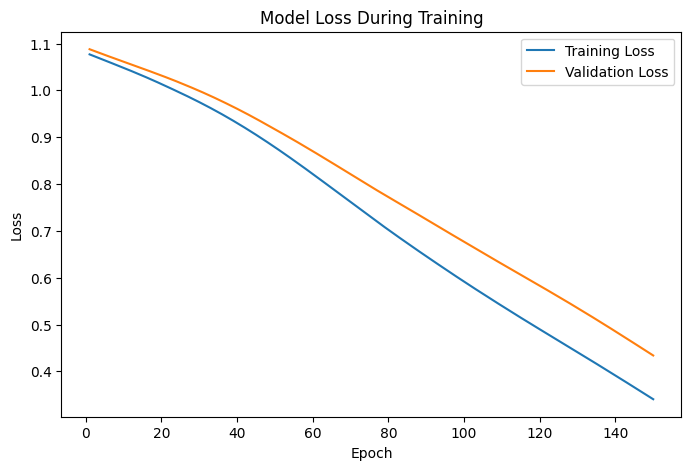

In [57]:
# Plotting actual training and validation loss
epochs = range(1, num_epochs + 1)
train_loss = history['loss']
val_loss = history['val_loss']

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Model Loss During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### Saving and Loading PyTorch Models

_torch.save()_ method saves the model into a file ending in .pth, which indicates that this file holds a serialized PyTorch model.

Serialization is a process where an object in memory (like our PyTorch model) is converted into a format that can be saved on disk or sent over a network. Hence, when we save a model, we're serializing the entire module.

We then load back the model into memory with _torch.load_. Note, that the weights_only parameter is set to False, which means that the entire model is loaded, including the architecture, weights, and other parameters. After loading, it's essential to set the model to evaluation mode with model.eval().

Finally, we evaluate the performance of both the original model and the loaded one: the two must be the same to confirm that the saving and loading process preserved the model accurately.

In [58]:
# Save the entire model
torch.save(model, 'wine_model.pth')

# Load the entire model
loaded_model = torch.load('wine_model.pth', weights_only=False)
loaded_model.eval()

# Verify the loaded model by evaluating it on test data
with torch.no_grad():
    # Make predictions for both models
    model.eval()
    original_outputs = model(X_test)
    loaded_outputs = loaded_model(X_test)
    # Format predictions
    _, original_predicted = torch.max(original_outputs, 1)
    _, loaded_predicted = torch.max(loaded_outputs, 1)
    # Calculate accuracies
    original_accuracy = accuracy_score(y_test, original_predicted)
    loaded_accuracy = accuracy_score(y_test, loaded_predicted)

# Display accuracies for both models
print(f'Original Model Accuracy: {original_accuracy:.4f}')
print(f'Loaded Model Accuracy: {loaded_accuracy:.4f}')

Original Model Accuracy: 0.9259
Loaded Model Accuracy: 0.9259


# PyTorch Techniques for Model Optimization

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler

from torch.utils.data import DataLoader, TensorDataset

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

### Introduction to Model Checkpointing

Model checkpointing allows to save the state of a model during training, ensuring that the best-performing models are preserved. It involves saving the state of a neural network model at various points during the training process. This is crucial for several reasons:

* Prevent Loss of Progress: In case of unexpected interruptions (e.g., power failure, hardware malfunction), checkpointing helps in resuming training from the last saved state.
  
* Save Best Performing Models: By saving the model whenever it achieves a new best performance on a validation set, we ensure that we retain the best version of our model.

Before starting the training loop, we first set up the initial parameters for checkpointing:

* _best_loss_ to keep track of the best validation loss. We initialize best_loss to float('inf') to ensure the first validation loss will trigger a model save
  
* _checkpoint_path_ where the model will be saved.

In [5]:
# Load dataset
wine = load_wine()
X = torch.tensor(wine.data, dtype=torch.float32)
y = torch.tensor(wine.target, dtype=torch.long)

# Split dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

# Define the model using nn.Sequential
model = nn.Sequential(
    nn.Linear(13, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 3)
)

# Define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Checkpointing parameters
best_loss = float('inf')
checkpoint_path = "best_model.pth"

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    # Validate the model
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_valid)
        val_loss = criterion(val_outputs, y_valid).item()
    
    # Save the model if the validation loss has decreased
    if val_loss < best_loss:
        best_loss = val_loss
        torch.save(model, checkpoint_path)
        print(f"Model saved at epoch {epoch} with validation loss {val_loss:.4f}!")

Model saved at epoch 0 with validation loss 8.4086!
Model saved at epoch 1 with validation loss 7.7307!
Model saved at epoch 2 with validation loss 7.0687!
Model saved at epoch 3 with validation loss 6.4322!
Model saved at epoch 4 with validation loss 5.8552!
Model saved at epoch 5 with validation loss 5.4101!
Model saved at epoch 6 with validation loss 5.1248!
Model saved at epoch 7 with validation loss 4.9540!
Model saved at epoch 8 with validation loss 4.8437!
Model saved at epoch 9 with validation loss 4.7569!
Model saved at epoch 10 with validation loss 4.6734!
Model saved at epoch 11 with validation loss 4.5903!
Model saved at epoch 12 with validation loss 4.5021!
Model saved at epoch 13 with validation loss 4.4082!
Model saved at epoch 14 with validation loss 4.3076!
Model saved at epoch 15 with validation loss 4.2015!
Model saved at epoch 16 with validation loss 4.0908!
Model saved at epoch 17 with validation loss 3.9761!
Model saved at epoch 18 with validation loss 3.8582!
Mod

### Model Training with Mini-Batches in PyTorch

In machine learning, there are three main methods for training models: stochastic gradient descent (SGD), full-batch gradient descent, and mini-batch gradient descent. Let's explain these using a simple analogy.
Imagine you are learning to shoot basketballs into a hoop:

* **1. Stochastic Gradient Descent (SGD)**: This is like shooting one basketball, adjusting your aim after each shot. You get feedback quickly, but each shot can be influenced by random factors, making the learning process noisy.

* **2. Full-Batch Gradient Descent**: This is like shooting all the basketballs you have, then reviewing your overall performance to adjust your aim. It gives you a clear picture but is slow and tiring because you have to shoot all the balls before making any adjustments.

* **3. Mini-Batch Gradient Descent**: This method is a middle ground. It’s like shooting a few basketballs (say 10) before adjusting your aim. It’s faster than shooting all the balls at once and more stable than adjusting after every single shot, offering a balanced approach.

Reasons to use it:

* **1. Efficiency**: Processing smaller subsets of data significantly reduces memory usage and can take advantage of parallel processing hardware.
  
* **2. Convergence**: Provides a balance between noisy updates (SGD) and slow updates (full-batch), which can stabilize convergence.
  
* **3. Regularization**: Each mini-batch introduces some noise into the parameter updates, which can help prevent overfitting.

In [36]:
# Load dataset
wine = load_wine()
X = torch.tensor(wine.data, dtype=torch.float32)
y = torch.tensor(wine.target, dtype=torch.long)

# Create DataLoader for mini-batches
batch_size = 32
dataset = TensorDataset(X, y)
data_loader = DataLoader(dataset, batch_size = batch_size, shuffle = True)   # data is shuffled at each epoch, improving the generalization capabilities of the model
print(f"Number of bathces: {len(data_loader)}\n")

# Define the model 
model = nn.Sequential(
    nn.Linear(13, 10),  
    nn.ReLU(),  
    nn.Linear(10, 10),  
    nn.ReLU(),  
    nn.Linear(10, 3)  
)

# Define criterion and optimizer
criterion = nn.CrossEntropyLoss()  
optimizer = optim.Adam(model.parameters(), lr = 0.001)

# Model training with mini-batches
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_X, batch_y in data_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        print(f'Batch Loss: {loss.item():.4f}. Number of elements in this batch: {batch_X.shape[0]}')
        running_loss += loss.item() * batch_X.size(0)   # this scaling is necessary because mini-batches can have different sizes, especially the last mini-batch, which might be smaller
    
    epoch_loss = running_loss / len(data_loader.dataset)
    print(f'Epoch [{epoch+1}/{num_epochs}] Average Loss: {epoch_loss:.4f}\n')

Number of bathces: 6

Batch Loss: 12.1249. Number of elements in this batch: 32
Batch Loss: 12.2767. Number of elements in this batch: 32
Batch Loss: 14.0084. Number of elements in this batch: 32
Batch Loss: 11.6432. Number of elements in this batch: 32
Batch Loss: 13.2737. Number of elements in this batch: 32
Batch Loss: 12.9781. Number of elements in this batch: 18
Epoch [1/10] Average Loss: 12.6970

Batch Loss: 9.7494. Number of elements in this batch: 32
Batch Loss: 7.2806. Number of elements in this batch: 32
Batch Loss: 9.1786. Number of elements in this batch: 32
Batch Loss: 9.4163. Number of elements in this batch: 32
Batch Loss: 9.0569. Number of elements in this batch: 32
Batch Loss: 9.9550. Number of elements in this batch: 18
Epoch [2/10] Average Loss: 9.0394

Batch Loss: 6.0275. Number of elements in this batch: 32
Batch Loss: 7.7926. Number of elements in this batch: 32
Batch Loss: 6.8153. Number of elements in this batch: 32
Batch Loss: 4.5269. Number of elements in this

### Learning Rate Scheduling in PyTorch

Learning rate scheduling is a technique used to adjust the learning rate during training to improve model convergence and performance. We want to gradually reduce the LR during training to avoid overfitting.

PyTorch offers several built-in learning rate schedulers to help manage the learning rate during training:

* **StepLR**: Reduces the learning rate by a factor every few epochs.

* **ExponentialLR**: Reduces the learning rate by a multiplicative factor.

* **ReduceLROnPlateau**: Reduces the learning rate when a metric has stopped improving.

Here we focus on the _ReduceLROnPlateau_ scheduler, which reduces the learning rate when a specified metric has stopped improving. This is useful in cases where the learning rate needs to adapt based on the performance of the model on a validation set, rather than following a predefined schedule.

We initialize the _ReduceLROnPlateau scheduler_ with a _mode_ of 'min', a _factor_ value of 0.1, and a _patience_ of 10 epochs. The mode = 'min' setting is used when you want to reduce the learning rate as soon as the monitored quantity (_validation loss_) stops decreasing. Essentially, if the validation loss does not improve (i.e., reduces) for 10 consecutive epochs, the scheduler will decrease the learning rate by a factor of 0.1.

In [46]:
# Load dataset
wine = load_wine()
X = torch.tensor(wine.data, dtype=torch.float32)
y = torch.tensor(wine.target, dtype=torch.long)

# Split dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = nn.Sequential(
    nn.Linear(13, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 3)
)

# Define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.1)

# Learning rate scheduler
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode = 'min', factor = 0.1, patience = 10)

# Model training with learning rate scheduling
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_valid)
        val_loss = criterion(val_outputs, y_valid)
    
    scheduler.step(val_loss)  # Update learning rate based on validation loss

    if (epoch + 1) % 10 == 0:
        lr = optimizer.param_groups[0]["lr"]
        print(f'Epoch [{epoch + 1}/{num_epochs}], loss_test: {val_loss:.8f} LR: {lr:.6f}')

Epoch [10/100], loss_test: 1.08774710 LR: 0.100000
Epoch [20/100], loss_test: 1.08734059 LR: 0.100000
Epoch [30/100], loss_test: 1.08659446 LR: 0.010000
Epoch [40/100], loss_test: 1.08499372 LR: 0.001000
Epoch [50/100], loss_test: 1.08491313 LR: 0.000100
Epoch [60/100], loss_test: 1.08490956 LR: 0.000010
Epoch [70/100], loss_test: 1.08490932 LR: 0.000001
Epoch [80/100], loss_test: 1.08490908 LR: 0.000000
Epoch [90/100], loss_test: 1.08490908 LR: 0.000000
Epoch [100/100], loss_test: 1.08490908 LR: 0.000000


### Overfitting Prevention with Regularization and Dropout

**Regularization** is a technique used to prevent overfitting in machine learning models. Overfitting occurs when a model learns not only the underlying patterns in the training data but also the random noise, leading to poor performance on new, unseen data. Regularization techniques add additional constraints or penalties to the model's learning process, encouraging it to focus on the most important patterns in the data and improving its generalization ability.

* **Dropout** is a regularization technique used to prevent overfitting in neural networks. During training, dropout layers randomly set a fraction of activations in the preceding layer to zero at each update. This prevents the network from becoming too dependent on any particular neurons, thereby promoting generalization.
The fraction of activations set to zero is determined by the dropout rate, typically a value between 0 and 1. For instance, a dropout rate of 0.2 implies that 20% of the neurons will be randomly dropped during each iteration of training. This technique helps in creating a more robust model that performs better on unseen data.
Dropout layers are added with _nn.Dropout(fraction)_

* **L2 regularization** is another regularization technique which penalizes large weights by adding their squared values to the loss function. This discourages the model from relying too heavily on any particular feature, thereby enhancing generalization. In PyTorch, L2 regularization is typically implemented by specifying the _weight_decay_ parameter in the optimizer.
We start training a model without L2 regularization and introduce it midway to observe its effect. We are also going to print the L2 norm of the weights in the first layer at different epochs to observe how they evolve over time. The L2 norm is a measure of the magnitude of the weights, calculated as the square root of the sum of the squared weights. It gives an indication of how large the weights are.

In [51]:
# Load and select the data
wine = load_wine()
X = wine.data
y = wine.target

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

# Define the model with dropout
model = nn.Sequential(
    nn.Linear(13, 10),
    nn.ReLU(),
    nn.Dropout(0.2),  # Dropout applied to the previous layer
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Dropout(0.1),  # Dropout applied to the previous layer
    nn.Linear(10, 3)
)

# Print the model summary
print(model)
print()

# Defining criterion and optimizer without weight decay
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  

for i in range(100):
    model.train()
    optimizer.zero_grad()  # Zero the gradient buffers
    outputs = model(X)  # Forward pass
    loss = criterion(outputs, y)  # Compute loss
    loss.backward()  # Backward pass

    if(i==50):
        # Introducing weight decay from 50th epoch on
        optimizer = optim.Adam(model.parameters(), lr = 0.001, weight_decay = 0.01) 
        print("\nRegularization added to optimizer\n")

    if (i+1) % 10 ==0:    
        # L2 norm of weights of the first linear layer 
        first_layer_weights = model[0].weight.norm(2).item()
        print(f'{i+1} - L2 norm of weights: {first_layer_weights}')

    optimizer.step()  # Update weights

Sequential(
  (0): Linear(in_features=13, out_features=10, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=10, out_features=10, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.1, inplace=False)
  (6): Linear(in_features=10, out_features=3, bias=True)
)

10 - L2 norm of weights: 1.7177019119262695
20 - L2 norm of weights: 1.720146894454956
30 - L2 norm of weights: 1.7237865924835205
40 - L2 norm of weights: 1.7300032377243042
50 - L2 norm of weights: 1.7370929718017578

Regularization added to optimizer

60 - L2 norm of weights: 1.6976491212844849
70 - L2 norm of weights: 1.6549012660980225
80 - L2 norm of weights: 1.613250970840454
90 - L2 norm of weights: 1.5738153457641602
100 - L2 norm of weights: 1.53805673122406
